<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#General-information" data-toc-modified-id="General-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General information</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Games-released-each-year" data-toc-modified-id="Games-released-each-year-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Games released each year</a></span></li><li><span><a href="#Sales-by-platform" data-toc-modified-id="Sales-by-platform-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sales by platform</a></span></li><li><span><a href="#Leading-sales" data-toc-modified-id="Leading-sales-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Leading sales</a></span></li><li><span><a href="#The-effect-of-critic-and-user-scores-on-sales" data-toc-modified-id="The-effect-of-critic-and-user-scores-on-sales-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>The effect of critic and user scores on sales</a></span></li><li><span><a href="#Comparing-games-across-different-platforms" data-toc-modified-id="Comparing-games-across-different-platforms-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Comparing games across different platforms</a></span></li><li><span><a href="#Genres" data-toc-modified-id="Genres-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Genres</a></span></li><li><span><a href="#User-profile-by-region" data-toc-modified-id="User-profile-by-region-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>User profile by region</a></span></li><li><span><a href="#User-profile-by-genre" data-toc-modified-id="User-profile-by-genre-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>User profile by genre</a></span></li><li><span><a href="#User-profile-by-rating-(ESRB)" data-toc-modified-id="User-profile-by-rating-(ESRB)-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>User profile by rating (ESRB)</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#The-mean-of-the-user-scores-for-XOne-and-PC-is-the-same" data-toc-modified-id="The-mean-of-the-user-scores-for-XOne-and-PC-is-the-same-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The mean of the user scores for XOne and PC is the same</a></span></li><li><span><a href="#The-mean-of-the-user-scores-for-genres-Action-and-Sports-is-different" data-toc-modified-id="The-mean-of-the-user-scores-for-genres-Action-and-Sports-is-different-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The mean of the user scores for genres <em>Action</em> and <em>Sports</em> is different</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

**Ice** is a worldwide online videogame store. It has provided us with a dataset of videogames with their characteristics and their sales. We will determine what makes a successfull game. This information will help **Ice** with their advertising campaigns. 

# General information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# read dataset into a DataFrame called 'df'
df = pd.read_csv('/datasets/games.csv')


# eliminate duplicated rows, if any
df.drop_duplicates()


# checking dataset's general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# taking a quick look at the first 10 rows of the data
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Here's a list of the task we are going to perform on the dataframe's columns, based on the information above:

* We'll format all of the column's names, making them lowercase.

* **Name**: There are two missing values. The name of the game is the most important feature, without it, there's no way of figuring it out. We'll eliminate these two rows.
* **Year of release**: We have 269 missing values. We can assume that the year of release if probably the less important aspect for determining the success of a game, as gamers won't pay attentio to it. We'll eliminate these missing values as they don't represent a meaningful fraction of the dataset. We'll convert the column's values to integers.
* **Genre**: As there are only two missing values, we'll fill them in with 'Other' as probably these games are hard to categorize.
* **Critic score**: There are many missing values. As can be seen, it seems that games that don't have a critic score also don't have user scores and genres. We notice that those games must be rated as *E*. This observation helps us to implement a method for filling missing values: we'll find the mean of the scores for games with the same genre and rated *E* and suse to fill the scores in.
* **User score**: We'll proceed as with *Critic score*. We'll convert the values to floats as well, however, we're told there are 'tbd' entries (meaning 'to be determined') for this column. We'll convert those to NaN as they basically represent the same.
* **Rating**: We'll fill the missing values with *E*, as we can observe that those games belong to this category by looking at the dataframe above.

# Data preprocessing

We'll apply the changes explained above.

In [4]:
# renaming of the columns
df.rename(columns={'Name': 'name',
           'Platform': 'platform',
           'Year_of_Release': 'year_of_release',
           'Genre': 'genre',
           'NA_sales': 'na_sales',
           'EU_sales': 'eu_sales',
           'JP_sales': 'jp_sales',
           'Other_sales': 'other_sales',
           'Critic_Score': 'critic_score',
           'User_Score': 'user_score',
           'Rating': 'rating'
          }, inplace=True)


# eliminate rows with missing values
df.dropna(subset=['name', 'year_of_release'], inplace=True)


# converting to integer values
df['year_of_release'] = df['year_of_release'].astype('int')


# fill genres
df['genre'].fillna('Other', inplace=True)

In [5]:
# converting values to float datatype
# and changing 'tbd' to 'nan' values
df['user_score'] = df['user_score'].apply(lambda x: np.nan if x=='tbd' else float(x))


# obtain the mean for games with the same genre and rated E
mean_critic = df.groupby(['genre', 'rating'], as_index=False)['critic_score'].mean().query('rating == "E"')
mean_user = df.groupby(['genre', 'rating'], as_index=False)['user_score'].mean().query('rating == "E"')


# defining a function to fill missing critic scores
def fill_missing_critic_scores(row):
    genre = row['genre']
    critic_score = mean_critic.query('genre == @genre')['critic_score'].iloc[0]
    #user_score = mean_user.query('genre == @genre')['user_score'].iloc[0]
    
    if pd.isna(row['critic_score']):
        return int(critic_score)
    else:
        return row['critic_score']
    

# defining a function to fill missing user scores
def fill_missing_user_scores(row):
    genre = row['genre']
    user_score = round(mean_user.query('genre == @genre')['user_score'].iloc[0], 1)
    
    if pd.isna(row['user_score']):
        return user_score
    else:
        return row['user_score']

    
#apply the functions
df['critic_score'] = df.apply(fill_missing_critic_scores, axis=1)
df['user_score'] = df.apply(fill_missing_user_scores, axis=1)

In [6]:
# filling missing genres
df['rating'].fillna('E', inplace=True)

Now, we will calculate the total sales for each game, and add that information to our dataframe.

In [7]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# checking the results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Summary

We have detected some issues in our dataset and fixed them. The column's names were changed to lowecase, columns with a few missing values were removed from the dataset, and in others those values were filled. A new column was added to the dataframe containing the total sales for each game across all regions. We're ready to analyze our data.

# Data analysis

## Games released each year

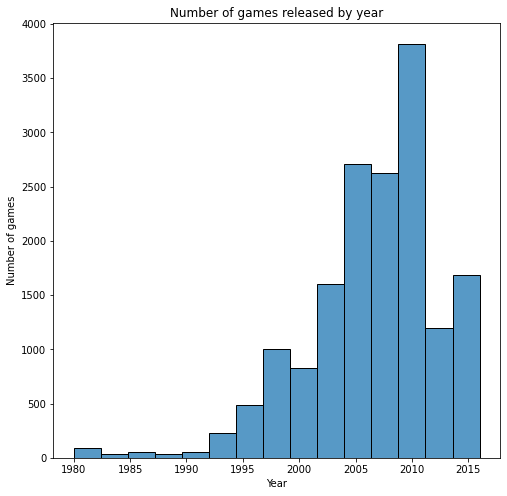

In [8]:
# creating a histogram indicating how many games were released by year
plt.figure(figsize=(8,8))
plt.title('Number of games released by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
sns.histplot(df['year_of_release'], bins=15)
plt.show()

The releases of games incremented notoriously as years passed, reaching a maximum at around 2010, then decreasing until 2016.

## Sales by platform

In [9]:
# grouping by total sales for each platform
grouped_by_platform = df.groupby('platform').sum().sort_values('total_sales', ascending=False)
grouped_by_platform['total_sales'].head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

We'll concentrate in the two platforms with more sales: PS2 and X360.

In [10]:
ps2_data = df.query('platform == "PS2"')
x360_data = df.query('platform == "X360"')
ps3_data = df.query('platform == "PS3"')

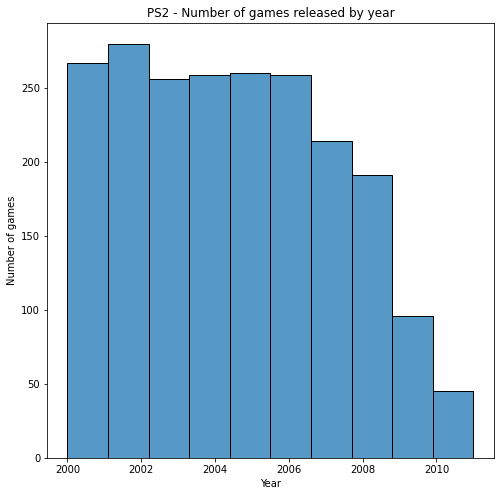

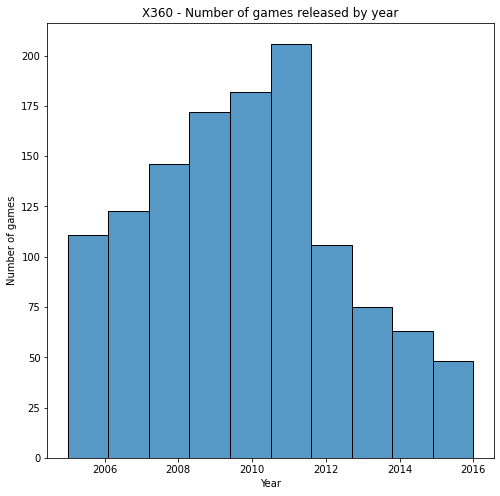

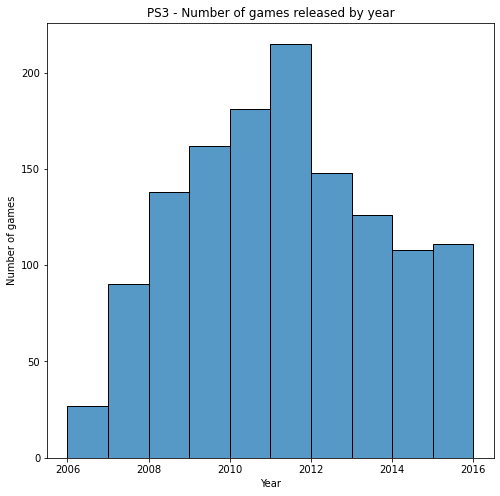

In [11]:
# analyzing games released by year
plt.figure(figsize=(8,8))
plt.title('PS2 - Number of games released by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
sns.histplot(ps2_data['year_of_release'], bins=10)
plt.show()

plt.figure(figsize=(8,8))
plt.title('X360 - Number of games released by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
sns.histplot(x360_data['year_of_release'], bins=10)
plt.show()

plt.figure(figsize=(8,8))
plt.title('PS3 - Number of games released by year')
plt.xlabel('Year')
plt.ylabel('Number of games')
sns.histplot(ps3_data['year_of_release'], bins=10)
plt.show()

As the histograms show, PS2 sales stayed relevant for about 8 years, then declining due to the new platform PS3 whose sales increased paired with PS2 sales descrease. X360 sales increased while the platform was relevant, then decreasing due to the new platform Xbox One.

Guven that in this industry new platforms that replace old ones appear, if we want to make a reliable analysis for the next year, we're going to use this years' information, because it shows the latest trends, otherwise we will be considering data for games and platforms that are outdated.

In [12]:
# making a slice of the latest data
latest_data = df.query('year_of_release == 2016')
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 94 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             502 non-null    object 
 1   platform         502 non-null    object 
 2   year_of_release  502 non-null    int64  
 3   genre            502 non-null    object 
 4   na_sales         502 non-null    float64
 5   eu_sales         502 non-null    float64
 6   jp_sales         502 non-null    float64
 7   other_sales      502 non-null    float64
 8   critic_score     502 non-null    float64
 9   user_score       502 non-null    float64
 10  rating           502 non-null    object 
 11  total_sales      502 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 51.0+ KB


We can start analyzing this data in order to draw useful information from it.

## Leading sales

In [13]:
# obtain information about leaders in sales
sales_leaders = latest_data.groupby('platform', as_index=False).sum().sort_values('total_sales', ascending=False)

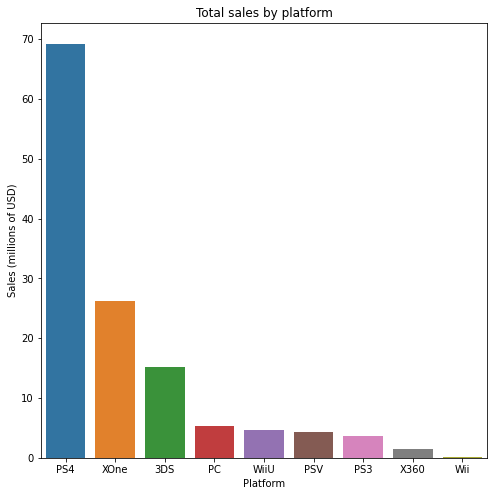

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x=sales_leaders['platform'], y=sales_leaders['total_sales'])
plt.title('Total sales by platform')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of USD)')
plt.show()

Now, we'll analyze the top 2 sales leaders in order to see their trendings.

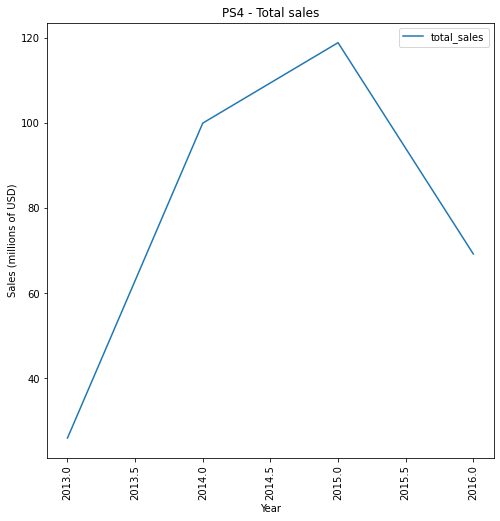

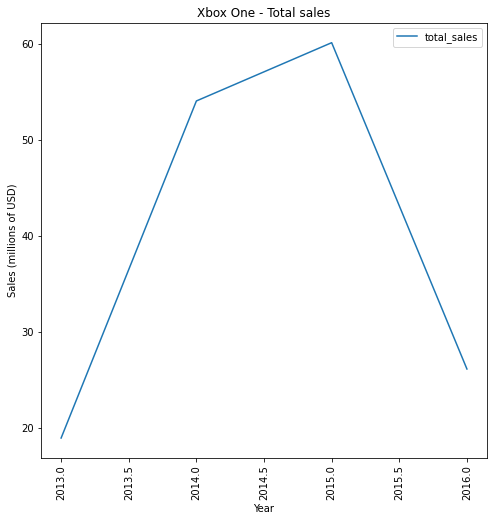

In [15]:
ps4_data = df[df['platform'] == 'PS4'][['year_of_release','total_sales']]
ps4_data = ps4_data.groupby('year_of_release').sum()

xone_data = df[df['platform'] == 'XOne'][['year_of_release','total_sales']]
xone_data = xone_data.groupby('year_of_release').sum()


# plotting the trends
plt.figure(figsize=(8,8))
sns.lineplot(data=ps4_data)
plt.xticks(rotation=90)
plt.title('PS4 - Total sales')
plt.xlabel('Year')
plt.ylabel('Sales (millions of USD)')
plt.show()

plt.figure(figsize=(8,8))
sns.lineplot(data=xone_data)
plt.xticks(rotation=90)
plt.title('Xbox One - Total sales')
plt.xlabel('Year')
plt.ylabel('Sales (millions of USD)')
plt.show()

The two most popular platforms show a decreasing in sales in recent years. Given that PS4 was the top sales platform for 2016 by far, it seems reasonable to think that even if there's a decrease in sales, this platform is the best for launching new games into the market.

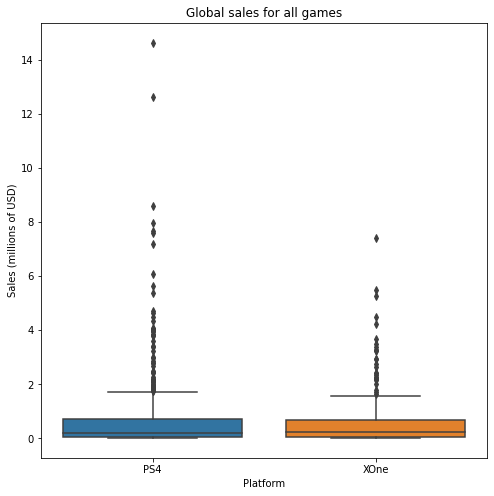

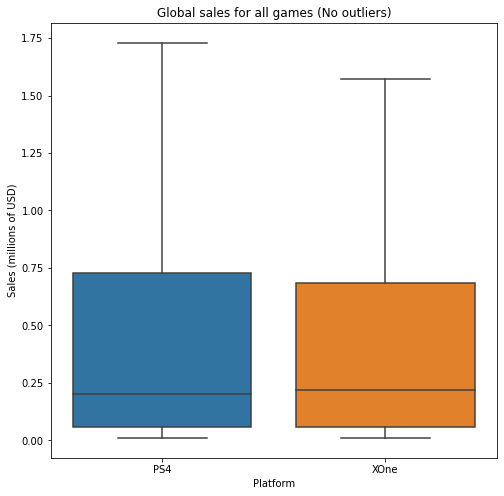

In [16]:
platforms = ['PS4', 'XOne']
data = df.query('platform in @platforms')
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title('Global sales for all games')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of USD)')
plt.show()

plt.figure(figsize=(8,8))
sns.boxplot(data=data, x='platform', y='total_sales', showfliers=False)
plt.title('Global sales for all games (No outliers)')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of USD)')
plt.show()

These boxplots show that the total sales for the top 2 sales leaders of 2016 are very similar. The IQR and the median for both platforms are about the same. The difference? The outliers. PS4 sold many high-price games, thusly the median of sales between the two platforms is very different.

## The effect of critic and user scores on sales

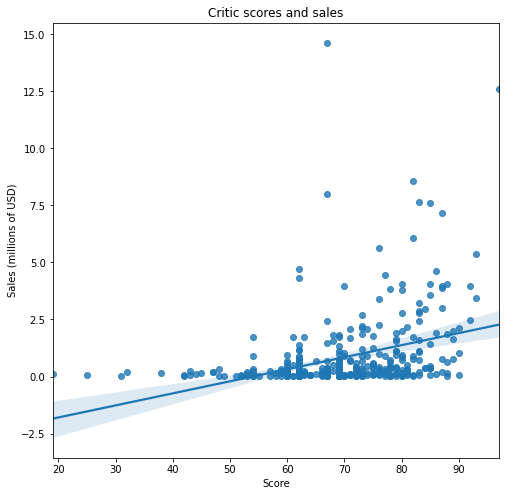

In [17]:
ps4_data = df.query('platform == "PS4"')
plt.figure(figsize=(8,8))
sns.regplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('Critic scores and sales')
plt.xlabel('Score')
plt.ylabel('Sales (millions of USD)')
plt.show()

In [18]:
# calculate the correlation between the two variales
ps4_data[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.363185
total_sales,0.363185,1.000000


Indeed, there's a positive correlation between the critic score and the total sales. However, let us note that the highest selling game got a score of around 65.

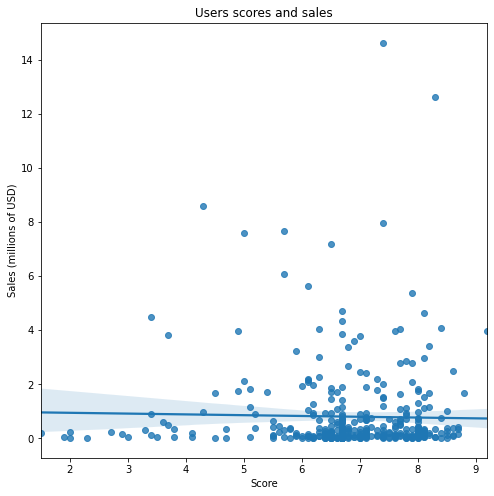

In [19]:
ps4_data = df.query('platform == "PS4"')
plt.figure(figsize=(8,8))
sns.regplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('Users scores and sales')
plt.xlabel('Score')
plt.ylabel('Sales (millions of USD)')
plt.show()

In [20]:
# calculate the correlation between the two variales
ps4_data[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.022364
total_sales,-0.022364,1.000000


A possibly surprising result: scores given by users do not affect a game's sales. It seems that scores given by experts (the critics) influence more on a game's sales than that of regular users.

## Comparing games across different platforms

In [21]:
# creating a dataframe with games and their prices for PS4 and XOne
game_sales_by_platform = data.pivot_table(index='name', columns='platform', values='total_sales')


# we want only games that were released for both platforms
game_sales_by_platform.dropna(inplace=True)


# checking the results
game_sales_by_platform

platform,PS4,XOne
name,,
7 Days to Die,0.14,0.05
Adventure Time: Finn & Jake Investigations,0.10,0.05
Agatha Christie's The ABC Murders,0.02,0.01
Alien: Isolation,1.12,0.50
Angry Birds Star Wars,0.22,0.17
...,...,...
Wolfenstein: The Old Blood,0.43,0.15
Worms: WMD,0.03,0.01
XCOM 2,0.14,0.04


Let us take a closer look at these sales.

In [22]:
game_sales_by_platform.mean()

platform
PS4     1.181336
XOne    0.596129
dtype: float64

We can see that PS4 has a greater mean (118,133 millions of dollars) than games of XOne, i.e., games released for PS4 are sold at higher prices.

## Genres

Now that we have the information that PS4 is the best platform to release games for, we'll take a look at what kind of games are more profitable.

In [23]:
latest_data.groupby('genre').sum()['total_sales'].sort_values(ascending=False)

genre
Shooter         38.22
Action          30.11
Sports          23.49
Role-Playing    18.18
Fighting         4.47
Adventure        3.82
Platform         3.23
Racing           2.79
Misc             2.60
Simulation       1.89
Strategy         1.13
Puzzle           0.01
Name: total_sales, dtype: float64

We have our top 4 best sellers: Shooter, Action, Sports, and Role-Playing.

## User profile by region

Let us create a user profile for each of the regions in our dataset. This will give us insight on user's behavior according to user's area.

In [24]:
user_profile_platforms = latest_data.groupby('platform').sum()[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
user_profile_platforms.sort_values('total_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS4,21.49,31.78,5.74,69.25
XOne,14.27,9.63,0.01,26.15
3DS,4.14,2.33,8.03,15.14
PC,1.36,3.53,0.00,5.25
WiiU,2.10,1.48,0.67,4.60


The EU leads sales of PS4 games, followed by NA. However, XOne sales are more popular in NA. In Japan, the most popular platform is 3DS, and they don't use PC at all!

## User profile by genre

Now, let us take a look at user's behavior regarding the game's genre.

In [25]:
user_profile_genre = latest_data.groupby('genre').sum()[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
user_profile_genre.sort_values('total_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Shooter,16.24,15.90,1.06,38.22
Action,9.29,10.68,7.07,30.11
Sports,7.54,12.01,0.92,23.49
Role-Playing,5.89,4.28,6.61,18.18
Fighting,1.84,1.34,0.75,4.47


Shooter games are more popular in NA and also in the EU than in Japan, with a huge difference in sales for the Japanese market. Action games are sold best in the EU as well as Sports games. Action games are more popular in Japan. Role-playing games are equally popular across all regions, as well as Fighting games.

## User profile by rating (ESRB)

This time, we'll take a look at how customer's behavior varies across regions due to the game's rating.

In [26]:
user_profile_rating = latest_data.groupby('rating').sum()[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
user_profile_rating.sort_values('total_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
E,16.50,21.08,15.39,58.34
M,15.67,16.54,1.20,38.35
T,8.95,9.79,2.27,24.12
E10+,3.81,3.81,0.45,9.13


In the EU, *Everyone* rated games are more popular, whereas in North America and Japan they're equally popular. *Mature* rated games are equally popular in the EU and NA, whereas in Japan tehy don't sell very well. The same goes for *Teen* rated games and *Everyone 10+* rated games.

# Hypothesis testing

Now, we want to test two hypothesis.

## The mean of the user scores for XOne and PC is the same

>**Null hypothesis**: The mean of the user scores for XOne and PC is the same

>**Alternate hypothesis**: The mean of the user scores for XOne and PC is different

In order to test this hypothesis, and since we are testing for the equality of the mean for two pupolations, we're going to use the "ttest_ind" method from the "scipy" library. But first, we need to obtain the average earnings, and check if the variances for the populations are the same or not, because the aforementioned method requieres as input the statemenet about the equality for those variances.

In [27]:
xone = latest_data.query('platform == "XOne"')
pc = latest_data.query('platform == "PC"')
print("Variance for XOne user scores:", np.var(xone['user_score']).round(3))
print("Variance for PC user scores:", np.var(pc['user_score']).round(3))

Variance for XOne user scores: 1.822
Variance for PC user scores: 2.548


The variances are not the same. We can test now.

In [28]:
# statistical significance of 5%
alpha = 0.05

results = st.ttest_ind(xone['user_score'], \
                       pc['user_score'], \
                       equal_var=False)


# printing the p-value
print('p-value:', results.pvalue)


# checking for the condition for accepting or rejecting the null hypothesis
if results.pvalue < alpha:
    print("We do not reject the null hypothesis")
else:
    print("We reject the null hypothesis")

p-value: 0.30824756448378277
We reject the null hypothesis


There's statistically significant evidence that the means for the user scores for the platforms XOne and PC are different.

## The mean of the user scores for genres *Action* and *Sports* is different

>**Null hypothesis**: The mean of the user scores for genres *Action* and *Sports* is different

>**Alternate hypothesis**: The mean of the user scores for genres *Action* and *Sports* is the same

In [29]:
action = latest_data.query('genre == "Action"')
sports = latest_data.query('genre == "Sports"')
print("Variance for Action genre:", np.var(action['user_score']).round(3))
print("Variance for Sports genre:", np.var(sports['user_score']).round(3))

Variance for Action genre: 1.024
Variance for Sports genre: 3.557


The variances are not the same. We can test now.

In [30]:
# statistical significance of 5%
alpha = 0.05

results = st.ttest_ind(action['user_score'], \
                       sports['user_score'], \
                       equal_var=False)


# printing the p-value
print('p-value:', results.pvalue)


# checking for the condition for accepting or rejecting the null hypothesis
if results.pvalue < alpha:
    print("We do not reject the null hypothesis")
else:
    print("We reject the null hypothesis")

p-value: 0.003242929266841647
We do not reject the null hypothesis


There's statistically significant evidence that the means for the user scores for the *Action* and *Sports* genres are different.

# Conclusion

After an initial look at the data, we fixed some issues present in it. We changed the column's names for better handling of them, we deleted some rows that had missing information. Other rows with missing values presented a pattern: critic scores, user scores, and rating were missing in them. We filled them based on other rows, taking into account the genre of the game in question.

After cleaning our data, we started analyzing it by looking at sales trends over the years by each platform. This helped us to pick the most popular and profitable platform to work with. PS4 was this platform. This helps us knowing what platform to choose when thinking of future games' releases. After selecting PS4 as our platform, we analyzed games released for this platform. We investigated how the critic and user scores affected the sales of a game, finding that critic scores have a correlation with sales, whereas user scores do not affect sales at all. Then, we found how a game, released for different platforms, does on sales. We found out that overall, games released for PS4 are more profitable, thus reinforcing the fact that for an advertising campaign, PS4 is the platform of choice.

Then, the most profitable genres were investigated, finding that *Shooter, Action, Sports*, and *Role-Playing* genres are the most profitable. This will help the company in their advertising campaingns.

After all these results, we studied user's profiles across the regions of North America, the European Union, and Japan. Our research brought about the facts that PS4 is indeed the most popular platform, *Shooter* games, and *Everyone* rated games are the most profitable.

Finally, we tested two hypothesis regarding user scores, with our findings being that the mean for user scores for XOne and PC platforms are different, and also that the mean for user scores for *Action* and *Sports* rated games are different as well.